... 직선 선로에서 열차가 80m/s의 속도를 유지하는지 확인하는 것이다. 위치와 속도 정보는 0.1초 간격으로 측정해서 저장하도록 되어있다. 

Problem statement (without input)
$$
\begin{aligned}
x_{k+1} &= Fx_k + \mathcal{w}_k\\
z_k &= Hx_k + \mathcal{V}_k
\end{aligned}
$$

1. Define state vector; $x$
$$
x = 
\begin{bmatrix}
displacement\\
velocity
\end{bmatrix}
=
\begin{bmatrix}
p\\
v
\end{bmatrix}
$$

2. Acquire system dynamics; $A$
$$
\begin{aligned}
\dot{x} &= Ax \\
\dot{x} &= 
\begin{bmatrix}
\dot{p}\\
\dot{v}
\end{bmatrix}
=
\begin{bmatrix}
v\\
0
\end{bmatrix} \\
&= 
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}
\begin{bmatrix}
p\\
v
\end{bmatrix}\\
A &= 
\begin{bmatrix}
0 & 1\\
0 & 0
\end{bmatrix}

\end{aligned}
$$

3. Convert system dynamics to state transition matrix; $F$
$$
\begin{aligned}
x_{k+1} &= Fx_k \\ 
x_{k+1} &= x _ k + \int_{0}^{\Delta t} \dot{x}_k dt \\
&= x_k + \int_{0}^{\Delta t} Ax_k dt \\
&= x_k + \Delta t A x_k  \\
&= (I + \Delta t A) x_k \\
&=
\left( 
\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}
+
\begin{bmatrix}
0 & \Delta t\\
0 & 0
\end{bmatrix}
\right)
x_k \\
&=
\begin{bmatrix}
1 & \Delta t\\
0 & 0
\end{bmatrix}
x_k \\
F &= 
\begin{bmatrix}
1 & \Delta t\\
0 & 0
\end{bmatrix}
\end{aligned}
$$

4. Define observation matrix; $H$
$$
\begin{aligned}
z &= 
\begin{bmatrix}
p
\end{bmatrix}
,
x = 
\begin{bmatrix}
p\\
v
\end{bmatrix} \\
H &= 
\begin{bmatrix}
1 & 0\\
\end{bmatrix} \\
(\because z_k &= Hx_k + \mathcal{V}_k)
\end{aligned} 
$$

5. Define noise covariance matrixs; $Q$ and $R$
* Q: by experiments & experience
* R: by manufaturer's specification
$$
Q = 
\begin{bmatrix}
1 & 0\\
0 & 3
\end{bmatrix}
, R = 10
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [3]:
dt = 0.1

set default values (A, H, Q, R)

In [4]:
F = np.array([[1, dt], [0, 1]])
H = np.array([1, 0])
Q = np.array([[1, 0],[0, 3]])
R = 10

Five kalman filter equations
$$
\begin{aligned}
\hat{x}_{\bar{k}} &= A\hat{x}_{k-1} \\
P_{\bar{k}} &= AP_{k-1}A^T+Q  \\
K_k &= P_{\bar{k}}H^T(HP_{\bar{k}}H^T+R)^{-1}  \\
\hat{x}_{k} &= \hat{x}_{\bar{k}} + K_k(z_{k}-H\hat{x}_{\bar{k}})  \\
P_{k} &= (I-K_kH)P_{\bar{k}}  
\end{aligned}
$$


In [5]:
def kalmanFilter(z):
  global x, P
  
  xp = F@x
  Pp = F@P@F.T + Q

  K = Pp@H.T * (H@Pp@H.T + R)**(-1)

  x = xp + K*(z - H@xp)
  P = Pp - K*H@Pp

  return x

get position value

In [7]:
def getpos():
  global pos, vel
  w = randint(-5, 5) # system noise
  v = randint(-5, 5) # measurement noise

  pos = pos + vel * dt

  z = pos + v
  vel = 80 + w

  return z

6. Set initial state and covariance; $\hat{x}_{\bar{0}}$, $P_{\bar{0}}$
$$
\hat{x}_{\bar{0}} = 
\begin{bmatrix}
0\\
20
\end{bmatrix},
P_{\bar{0}} =
\begin{bmatrix}
5 & 0\\
0 & 5
\end{bmatrix}
$$

In [8]:
pos, vel = 0, 80
x = np.array([0, 20]).T
P = 5*np.eye(2)
times = []
kalman_pos = []
true_pos = []
kalman_vel = []
true_vel = []
for t in np.arange(0, 10, dt):
  z = getpos()
  r = kalmanFilter(z)
  times.append(t) 
  kalman_pos.append(r[0])
  true_pos.append(pos)
  kalman_vel.append(r[1])
  true_vel.append(vel)

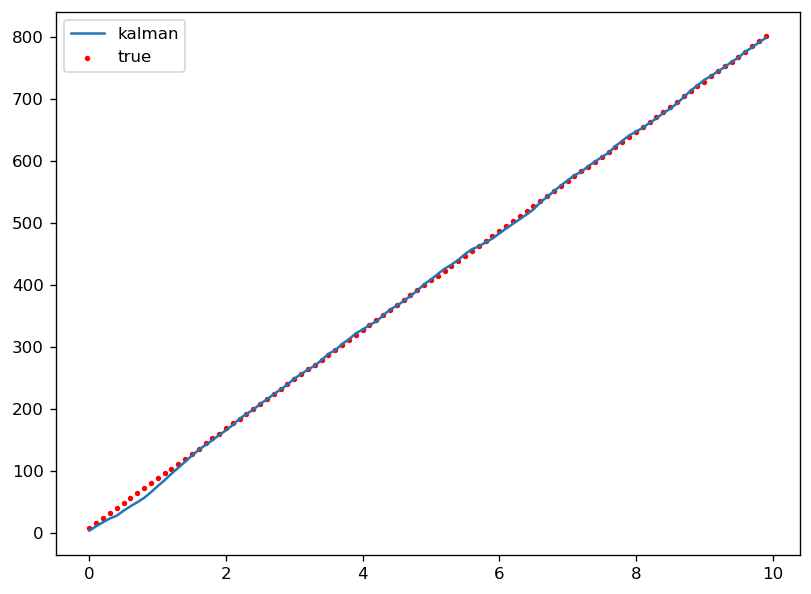

In [9]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(times, kalman_pos, label='kalman')
plt.scatter(times, true_pos, label='true',s=5 , c='r')
plt.legend()
plt.show()

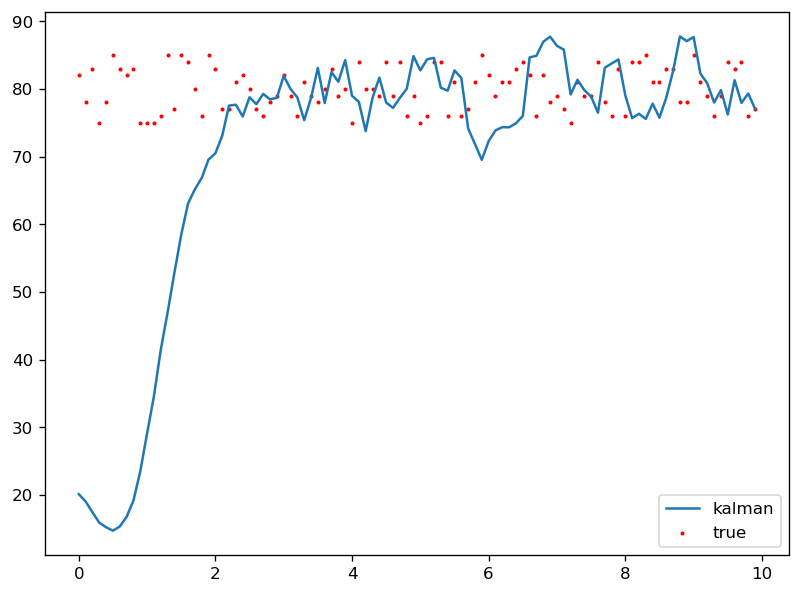

In [10]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(times, kalman_vel, label='kalman')
plt.scatter(times, true_vel, label='true', s=2, c='r')
plt.legend()
plt.show()

Change R value 10 to 2\
-> measurement noise is smaller\
-> kalman gain goes larger\
-> give more trust to the measurement

In [11]:
R = 2

pos, vel = 0, 80
x = np.array([0, 20]).T
P = 5*np.eye(2)
times = []
kalman_pos = []
true_pos = []
kalman_vel = []
true_vel = []
for t in np.arange(0, 10, dt):
  z = getpos()
  r = kalmanFilter(z)
  times.append(t) 
  kalman_pos.append(r[0])
  true_pos.append(pos)
  kalman_vel.append(r[1])
  true_vel.append(vel)

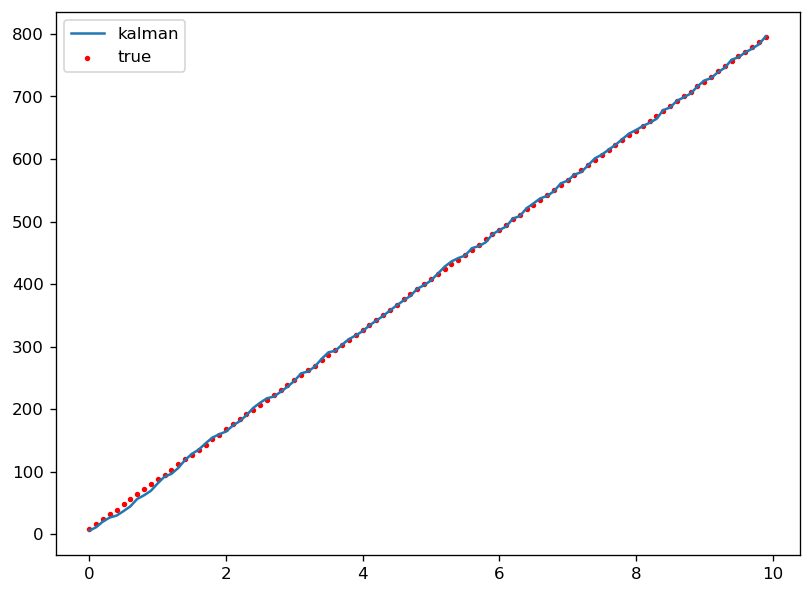

In [12]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(times, kalman_pos, label='kalman')
plt.scatter(times, true_pos, label='true',s=5 , c='r')
plt.legend()
plt.show()

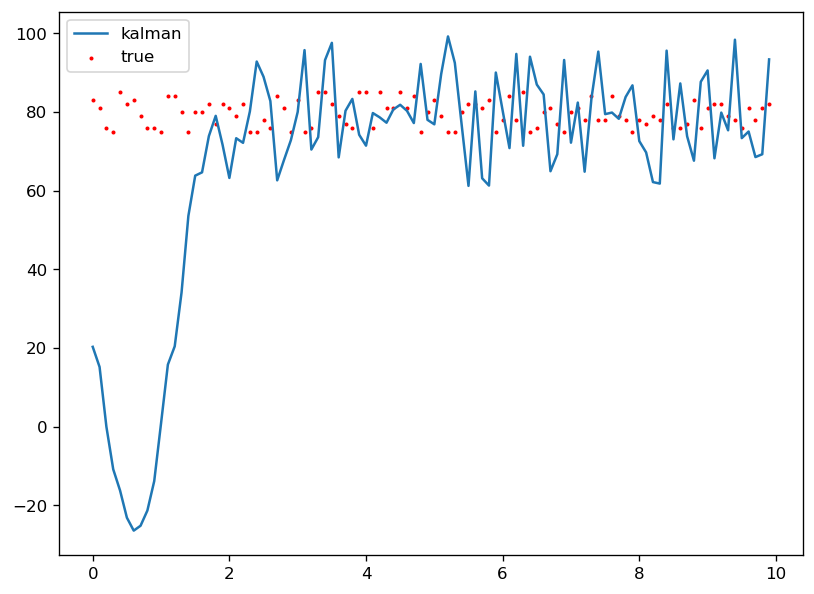

In [14]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(times, kalman_vel, label='kalman')
plt.scatter(times, true_vel, label='true', s=2, c='r')
plt.legend()
plt.show()

Change R value 10 to 50\
-> measurement noise is bigger\
-> kalman gain goes smaller\
-> give more trust to the prediction

In [15]:
R = 50

pos, vel = 0, 80
x = np.array([0, 20]).T
P = 5*np.eye(2)
times = []
kalman_pos = []
true_pos = []
kalman_vel = []
true_vel = []
for t in np.arange(0, 10, dt):
  z = getpos()
  r = kalmanFilter(z)
  times.append(t) 
  kalman_pos.append(r[0])
  true_pos.append(pos)
  kalman_vel.append(r[1])
  true_vel.append(vel)

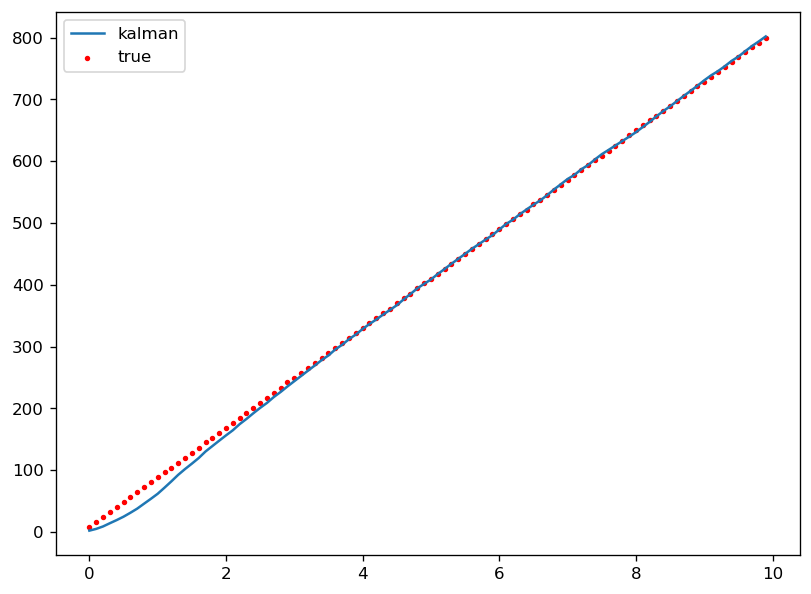

In [16]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(times, kalman_pos, label='kalman')
plt.scatter(times, true_pos, label='true',s=5 , c='r')
plt.legend()
plt.show()

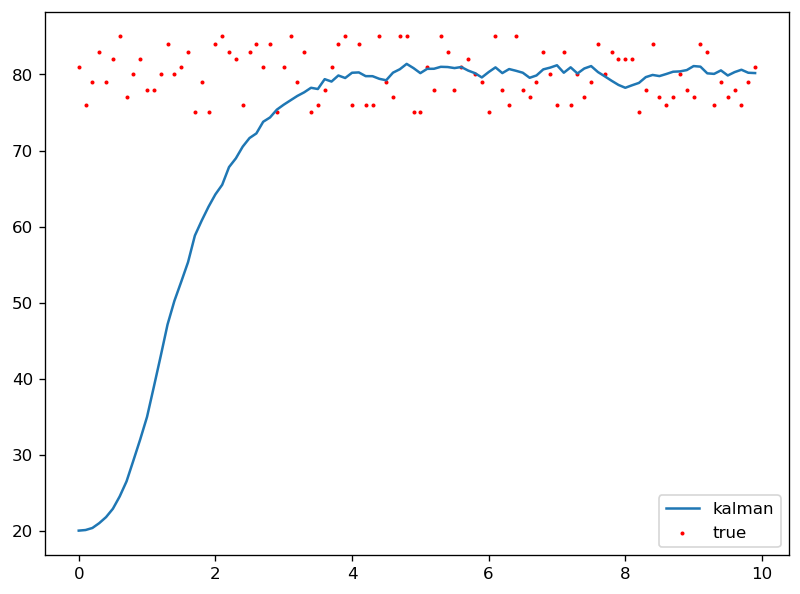

In [17]:
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(times, kalman_vel, label='kalman')
plt.scatter(times, true_vel, label='true', s=2, c='r')
plt.legend()
plt.show()

# Kalman filter on sonar position data

$$
\begin{aligned}
P_{\bar{k}} &= AP_{k-1}A^T+Q \\
K_k &= P_{\bar{k}}H^T(HP_{\bar{k}}H^T+R)^{-1} 
\end{aligned}
$$

In [177]:
from scipy.io import loadmat
mat = loadmat('./source/2.MovAvgFilter/SonarAlt.mat')
print(mat['sonarAlt'])
print(mat['sonarAlt'].shape)


[[34.25491256 33.60223519 33.60223519 ... 36.55540305 36.55540305
  36.55540305]]
(1, 1501)


In [181]:
def gen_sonarpos():
  mat = loadmat('./source/2.MovAvgFilter/SonarAlt.mat')
  mat = mat['sonarAlt'][0]
  for i in range(mat.size):
    yield mat[i]



In [204]:
pos, vel = 0, 80
x = np.array([0, 20]).T
P = 5*np.eye(2)
times = []
kalman_pos = []
sonar_pos = []
kalman_vel = []

sonarpos = gen_sonarpos()
for t in np.arange(0, 150, dt):
  z = next(sonarpos)
  r = kalmanFilter(z)
  times.append(t) 
  kalman_pos.append(r[0])
  kalman_vel.append(r[1])
  sonar_pos.append(z)


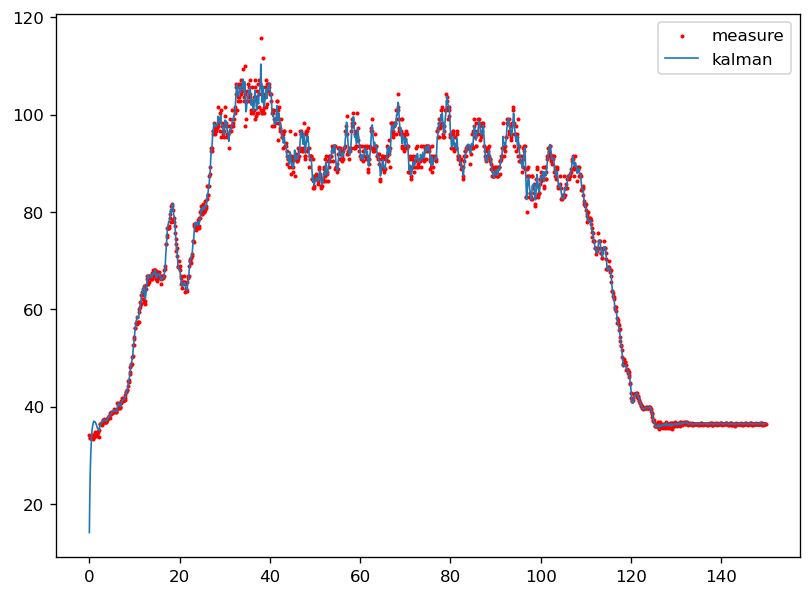

In [209]:
plt.figure(figsize=(8, 6), dpi=120)
plt.scatter(times, sonar_pos, label='measure', s=2, c='r')
plt.plot(times, kalman_pos, label='kalman', linewidth=1)
plt.legend()
plt.show()

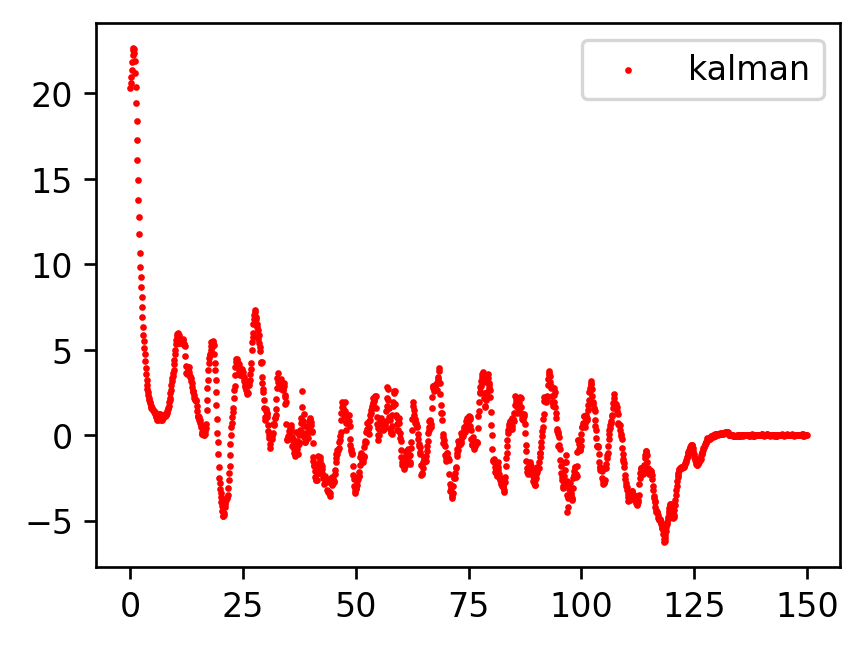

In [192]:
plt.figure(figsize=(4, 3), dpi=240)
plt.scatter(times, kalman_vel, label='kalman', s=1, c='r')
plt.legend()
plt.show()